In [9]:
ss='Hello, world!'
print(ss)
print()
print(ss[:7])
print(ss[7:])

Hello, world!

Hello, 
world!


In [2]:
#for文 インデントで繰り返すブロックを示す
for i in range(6):
    print(i)


0
1
2
3
4
5


In [8]:
#要素を書いてfor文を回す例(1)
for i in [0,1,2,3,4,5]:
    print(i)



0
1
2
3
4
5


In [9]:
#要素を書いてfor文を回す例(2)
for i in [5,13,7]:
    print(i,i*i)

5 25
13 169
7 49


In [1]:
#while文
i=0
while i<5:
    print(i)
    i+=1


0
1
2
3
4


In [10]:
#if 文
i=2
if i%2==0:
    print(i)

2


グラフを描くのは簡単

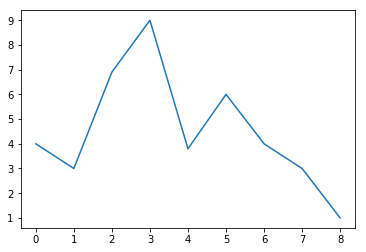

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt #グラフ描画ライブラリ
y=[4,3,6.9,9,3.8,6,4,3,1]
plt.plot(y)
#plt.ylim(0,10)
plt.show()

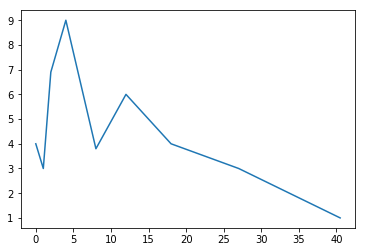

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt #グラフ描画ライブラリ
x=[0,1,2,4,8,12,18,27,40.5]
y=[4,3,6.9,9,3.8,6,4,3,1]
plt.plot(x,y)
plt.show()

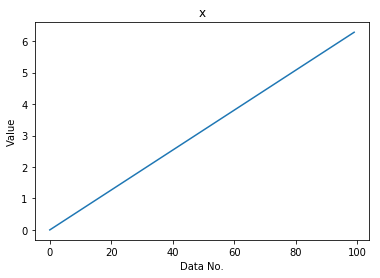

In [14]:
%matplotlib inline
import numpy as np #強力な配列計算モジュール
import matplotlib.pyplot as plt 

x=np.linspace(0,2*np.pi,100)

plt.title('x')
plt.xlabel('Data No.')
plt.ylabel('Value')

plt.plot(x)

plt.show()
#print(x)


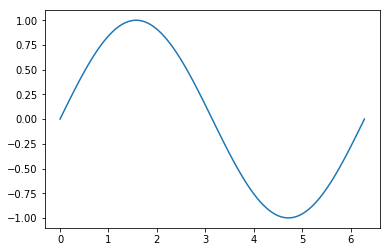

In [15]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
x=np.linspace(0,2*np.pi,100)
y=np.sin(x)
#print(y)
plt.plot(x,y)
plt.show()


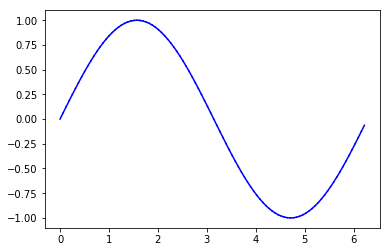

In [1]:
%matplotlib inline

from math import sin,pi
import matplotlib.pyplot as plt 

plt.figure()
x0,y0=0,0
for i in range(100):
    x=2*pi/100*i
    y=sin(x)
    plt.plot((x0,x),(y0,y),color='blue')
    x0=x; y0=y
plt.show()
# for文 を使っても書けるが、Python流ではない

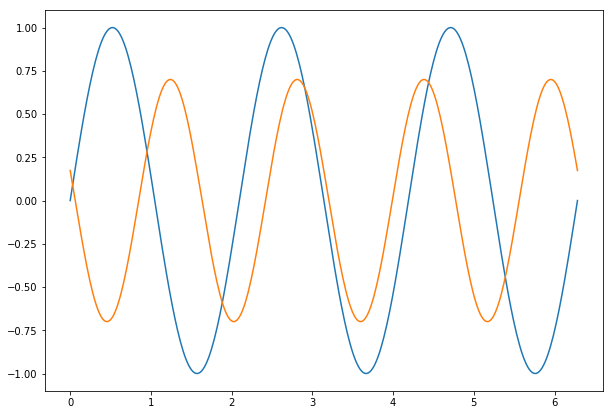

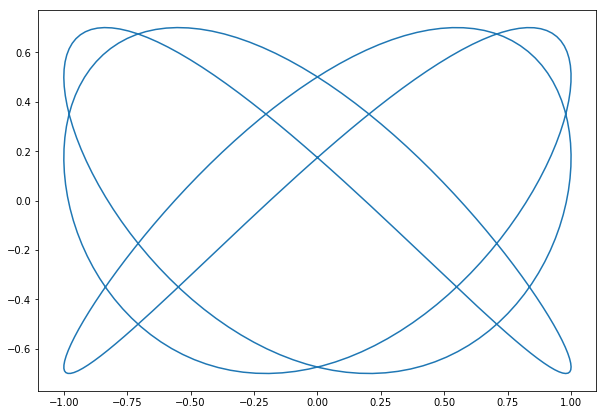

In [11]:
#リサージュを描いてみる
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

x=np.linspace(0,2*np.pi,360)
y1=np.sin(3*x)
y2=0.7*np.cos(4*x+1.32)

plt.figure(figsize=(10,7))
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

plt.figure(figsize=(10,7))
plt.plot(y1,y2)
plt.show()

In [3]:
#from __future__ import print_function
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from ipywidgets import widgets
import numpy as np

def f(d):
    x=np.linspace(0,2*np.pi,200)
    y1=np.sin(x)
    y2=np.sin(x-d)

    plt.figure(figsize=(6,7))
    plt.subplot(2,1,1)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.subplot(2,1,2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(y1,y2)
    #plt.show()
interact(f, d=(0, 2*np.pi, np.pi/6));

A Jupyter Widget

1.33313894154


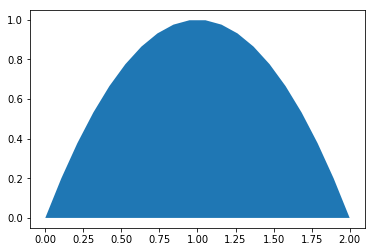

In [20]:
#面積の計算
from scipy.integrate import simps
x=np.linspace(0,2,20)
y=-x**2+2*x
print(simps(y, x=x))
fig2, ax2 = plt.subplots()
ax2.fill(x, y)
plt.show()

am,T 17000000.0 21925.562852364284


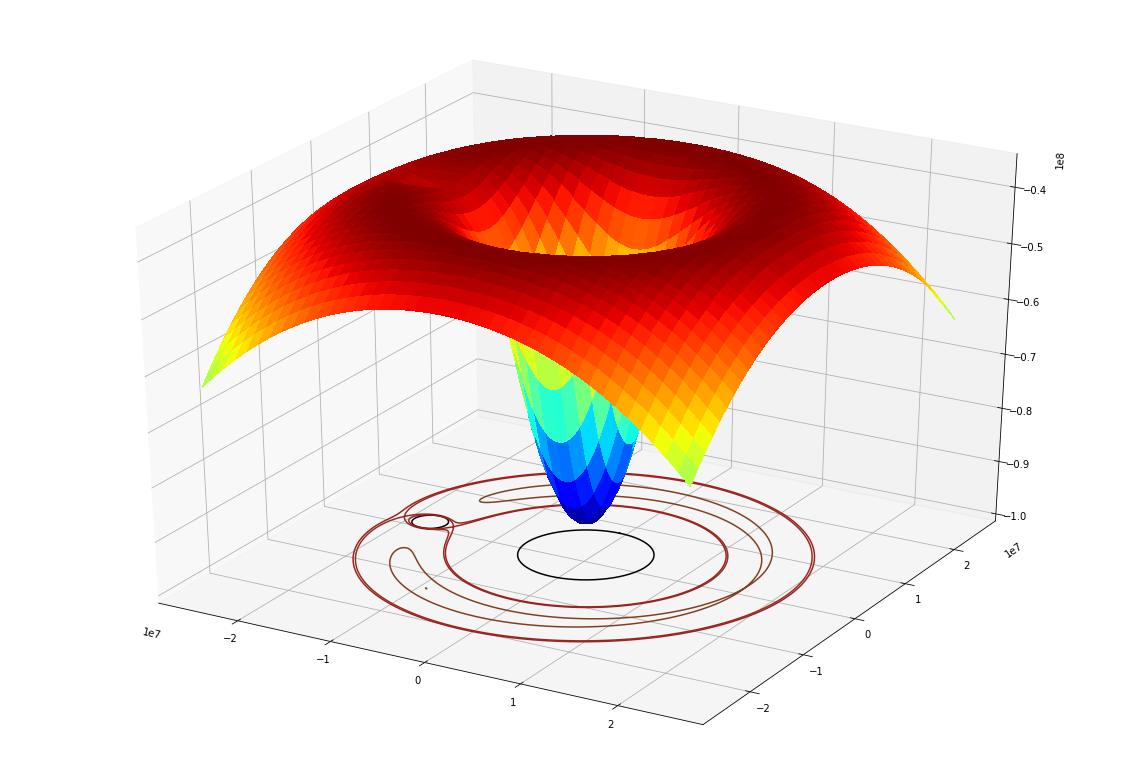

/Users/myoga/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'zdir'
  s)


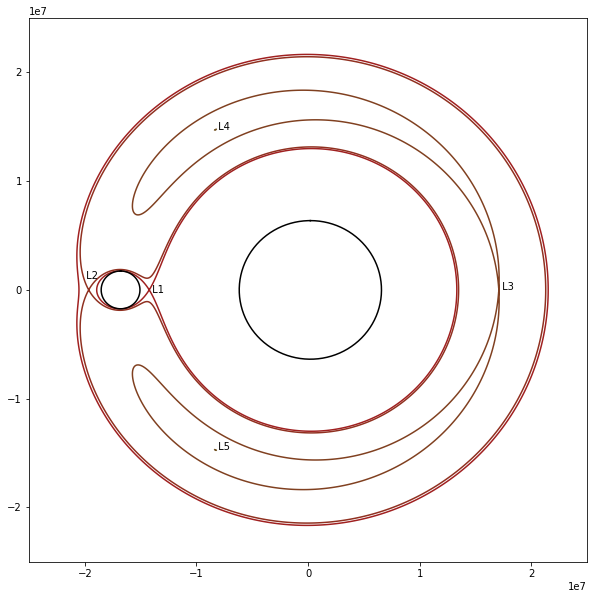

In [3]:
#ロッシュポテンシャルの描画
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np


pi=3.14159265358979323846266338357
G=6.67384e-11

T=13.1*3600 #


Me=5.972e24; Mm=7.3458e22

Re=6.371e6; Rm=3.4743e6/2
M=Mm/(Me+Mm)
rho_M=Me/(4./3*np.pi*Re**3)
rho_m=Mm/(4./3*np.pi*Rm**3)

am=17000e3

omega=(G*(Me+Mm)/am**3)**0.5
T=2*np.pi/omega
print('am,T',am,T)


l=2.5e7

xs=-l; xe=l; ys=-l; ye=l

x=np.arange(xs,xe,(xe-xs)/2800)
y=np.arange(ys,ye,(ye-ys)/2800)
x,y=np.meshgrid(x,y)
ix=np.arange(2800)
iy=np.arange(2800)
ix,iy=np.meshgrid(ix,iy)
phi=-G*Me/((x-M*am)**2+y**2)**0.5-G*Mm/((x+(1-M)*am)**2+y**2)**0.5-omega**2*(x**2+y**2)/2.0
phi_e=-G*Me/((x-M*am)**2+y**2)**0.5
phi_ei=G*Me*(0.5*((x-M*am)**2+y**2)/Re**3-1.5/Re)



phi_m=-G*Mm/((x+(1-M)*am)**2+y**2)**0.5
phi_mi=G*Mm*(0.5*((x+(1-M)*am)**2+y**2)/Rm**3-1.5/Rm)
phi_c=-omega**2*(x**2+y**2)/2.0
cxe,cxm=M*am,-(1-M)*am

idx_e=((x-cxe)**2+y**2<=Re**2)
idx_m=((x-cxm)**2+y**2<=Rm**2)

phi_e[idx_e]=phi_ei[idx_e]
phi_m[idx_m]=phi_mi[idx_m]

theta=np.linspace(0,2*np.pi,200)
xx_e=cxe+Re*np.sin(theta)
yy_e=Re*np.cos(theta)
xx_m=cxm+Rm*np.sin(theta)
yy_m=Rm*np.cos(theta)

c=phi[1400,2790] #np.max(phi)

mx=np.max(phi[idx_m])
ixmn,ixmx,s_idx=np.min(ix[idx_m]),np.max(ix[idx_m]),np.sum(idx_m)
th=np.max(phi[1400,ixmx:])*1.005
idx_th=phi<th

c1=np.min(phi)
c2=np.min(phi[:,:500])

phi=phi_e+phi_m+phi_c

xm_m=np.min(x[idx_m])
xm_p=np.max(x[idx_m])
xe_m=np.min(x[idx_e])
xe_p=np.max(x[idx_e])
ixm_m=np.where(x[1400,:]==xm_m)[0][0]
ixm_p=np.where(x[1400,:]==xm_p)[0][0] 
ixe_m=np.where(x[1400,:]==xe_m)[0][0] 
ixe_p=np.where(x[1400,:]==xe_p)[0][0] 
pot_L1=np.max(phi[1400,ixm_p:ixe_m])
pot_L2=np.max(phi[1400,:ixm_m])
pot_L3=np.max(phi[1400,ixe_p:])
pot_L4=np.max(phi[1400:,:])
pot_L5=np.max(phi[:1400,:])
iy_=1400
ix_L1=np.where(phi[1400,:]==pot_L1)[0][0]
ix_L2=np.where(phi[1400,:]==pot_L2)[0][0]
ix_L3=np.where(phi[1400,:]==pot_L3)[0][0]
ix_L4=np.where(phi[1400:,:]==pot_L4)[1][0]
iy_L4=np.where(phi[1400:,:]==pot_L4)[0][0]+1400
ix_L5=np.where(phi[:1400,:]==pot_L5)[1][0]
iy_L5=np.where(phi[:1400,:]==pot_L5)[0][0]


if 0:
    plt.figure(figsize=(10,10))
    plt.imshow(np.log(-phi),cmap=plt.cm.jet_r) 
    #plt.imshow(phi) 
    plt.show()

fig = plt.figure(figsize=(20,14))
ax = fig.gca(projection='3d')

Z = phi
mx=np.max(Z)
levels=np.array([pot_L1,pot_L2,pot_L3,pot_L4-10]) #,np.max(Z[1400,2200:])]) #,mx-1e4,mx-1e1])

ax.set_zlim3d=(-1.8e7,-2.5e7)
surf = ax.plot_surface(x, y, Z, rstride=70, cstride=70, cmap=cm.jet,
        linewidth=0.3, antialiased=False)
cset = ax.contour(x, y, Z,levels, zdir='z', offset=-10e7, colors=['#a02020','#903020','#804020','#705020'])
#plt.savefig('phi_roche.jpg')
zz=xx_e*0-10e7
ax.plot(xx_e,yy_e,zz,color='black')
ax.plot(xx_m,yy_m,zz,color='black')

plt.show()

fig=plt.figure(figsize=(10,10))
plt.contour(x, y, Z,levels, zdir='z',  colors=['#a02020','#903020','#804020','#705020'])
plt.plot(xx_e,yy_e,color='black')
plt.plot(xx_m,yy_m,color='black')

plt.annotate(' L1',(x[iy_,ix_L1],y[iy_,ix_L1]),xytext=(x[iy_,ix_L1],y[iy_,ix_L2]-3e5))
plt.annotate(' L2',(x[iy_,ix_L2],y[iy_,ix_L2]),xytext=(x[iy_,ix_L2]-5e5,y[iy_,ix_L2]+1e6))
plt.annotate(' L3',(x[iy_,ix_L3],y[iy_,ix_L3]))
plt.annotate(' L4',(x[iy_L4,ix_L4],y[iy_L4,ix_L4]))
plt.annotate(' L5',(x[iy_L5,ix_L5],y[iy_L5,ix_L5]))

plt.show()

if False:
    fig=plt.figure(figsize=(10,10))

    g=np.gradient(phi)
    plt.streamplot(x,y, -g[1], -g[0])
    plt.plot(xx_e,yy_e,color='black')
    plt.plot(xx_m,yy_m,color='black')
    plt.show()


In [4]:
#!conda install -c anaconda basemap
#!conda install -c conda-forge basemap-data-hires -y

/Users/myoga/anaconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


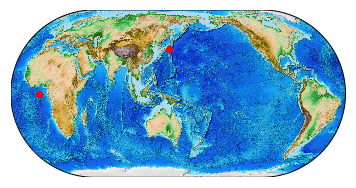

In [13]:
#地図の描画の例、basemap モジュール のインストールが必要
#!conda install -c anaconda basemap
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.figure()
m = Basemap(projection='eck4',lon_0=150,resolution='l')
m.etopo()
x,y=m(139.766,35.6814)
m.plot(x,y,'ro') 
x1,y1=m(0,0)
m.plot(x1,y1,'ro')
plt.show()

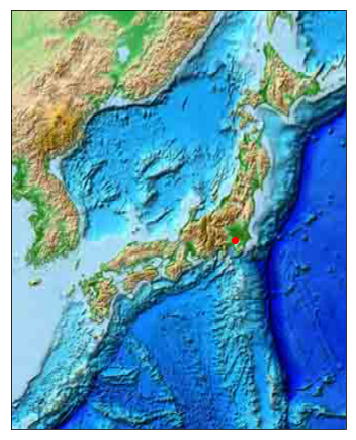

In [3]:
#地図の描画の例
#
#!conda install -c conda-forge basemap-data-hires -y
#
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(6,8))
m = Basemap(projection='merc',llcrnrlat=25.0,urcrnrlat=47.0,\
            llcrnrlon=125.0,urcrnrlon=147.0,resolution='l')
m.etopo()
x,y=m(139.766,35.6814)
m.plot(x,y,'ro') 
plt.show()


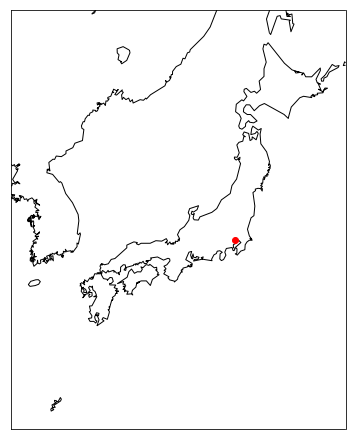

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(6,8))
m.drawcoastlines()
x,y=m(139.766,35.6814)
m.plot(x,y,'ro') 
plt.show()


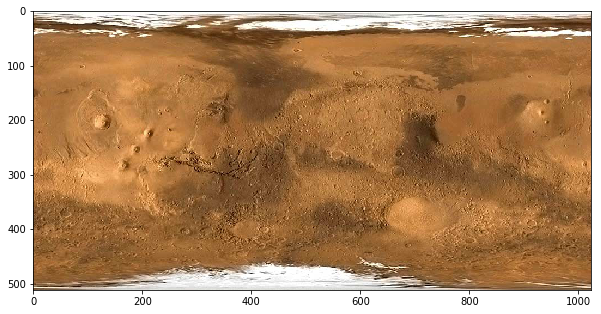

/Users/myoga/anaconda3/envs/py36/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


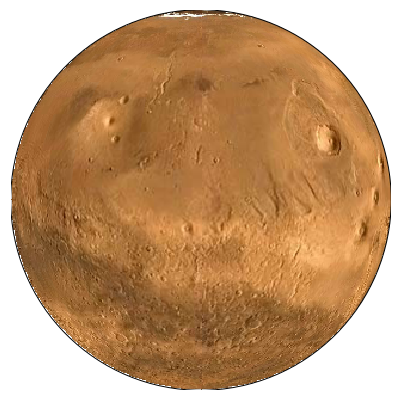

In [3]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.

import io
import urllib.request
from PIL import Image

#url='https://marsoweb.nas.nasa.gov/globalData/images/fullscale/MOLA_cylin.jpg'
url='http://www.physics.sfasu.edu/astro/mars/marsmap.jpg'
#url='https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Venus_map_NASA_JPL_Magellan-Venera-Pioneer.jpg/880px-Venus_map_NASA_JPL_Magellan-Venera-Pioneer.jpg'

f = io.BytesIO(urllib.request.urlopen(url).read())
img = Image.open(f).resize((1024,512))
plt.figure(figsize=(10,7))
plt.imshow(img)
plt.show()

from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(7,7))
m = Basemap(projection='ortho',lon_0=180,lat_0=0,resolution='l')
m.warpimage(url)
plt.show()

0.8143212795257568


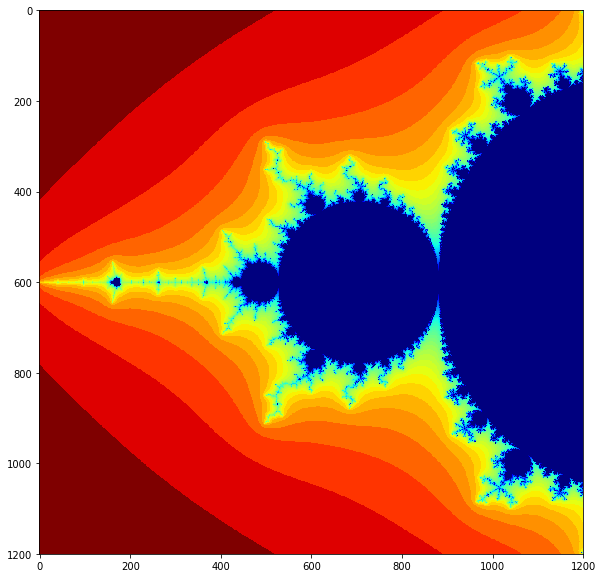

In [9]:

import numba
from numba import jit, complex128
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

t0=time.time()
@jit(locals=dict(c=complex128, z=complex128))
def mandelbrot_numba(m, size, iterations,p1=3.):
    for i in range(size):
        for j in range(size):
            c = -2 + p1/size*j + 1j*(p1/2.-p1/size*i)
            z = 0
            for n in range(iterations):
                if abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break
size = 1200
iterations = 100                    
m = np.zeros((size, size))
mandelbrot_numba(m, size, iterations,1.7) #1.884)

print(time.time()-t0)

plt.figure(figsize=(10,10))
plt.imshow(np.log(m), cmap=plt.cm.jet_r,);
plt.show()
#plt.xticks([]); plt.yticks([]);


In [1]:
from IPython.display import clear_output

In [ ]:
#http://ipython-books.github.io/featured-02/
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

g = 9.81  # gravity of Earth
m = 0.05  # mass, in kg
n = 20  # number of masses
e = .1  # initial distance between the masses
l = e  # relaxed length of the springs
k = 10000  # spring stiffness

P0 = np.zeros((n, 2))
P0[:,0] = np.repeat(e*np.arange(n//2), 2)
P0[:,1] = np.tile((0,-e), n//2)

A = np.eye(n, n, 1) + np.eye(n, n, 2)

L = l * (np.eye(n, n, 1) + np.eye(n, n, 2))
for i in range(n//2-1):
    L[2*i+1,2*i+2] *= np.sqrt(2)
I, J = np.nonzero(A)

dist = lambda P: np.sqrt((P[:,0]-P[:,0][:, np.newaxis])**2 + 
                         (P[:,1]-P[:,1][:, np.newaxis])**2)

def show_bar(P):
    plt.figure(figsize=(5,4));
    # Wall.
    plt.axvline(0, color='k', lw=3);
    # Distance matrix.
    D = dist(P)
    # We plot the springs.
    for i, j in zip(I, J):
        # The color depends on the spring tension, which
        # is proportional to the spring elongation.
        c = D[i,j] - L[i,j]
        plt.plot(P[[i,j],0], P[[i,j],1], 
                 lw=2, color=plt.cm.copper(c*150));
    # We plot the masses.
    plt.plot(P[[I,J],0], P[[I,J],1], 'ok',);
    # We configure the axes.
    plt.axis('equal');
    plt.xlim(P[:,0].min()-e/2, P[:,0].max()+e/2);
    plt.ylim(P[:,1].min()-e/2, P[:,1].max()+e/2);
    plt.xticks([]); plt.yticks([]);
    
show_bar(P0);
plt.title("Initial configuration");


def energy(P):
    # The argument P is a vector (flattened matrix).
    # We convert it to a matrix here.
    P = P.reshape((-1, 2))
    # We compute the distance matrix.
    D = dist(P)
    # The potential energy is the sum of the
    # gravitational and elastic potential energies.
    return (g * m * P[:,1].sum() + 
            .5 * (k * A * (D - L)**2).sum())

bounds = np.c_[P0[:2,:].ravel(), P0[:2,:].ravel()].tolist() + \
         [[None, None]] * (2*(n-2))
P1 = opt.minimize(energy, P0.ravel(),
                  method='L-BFGS-B',
                  bounds=bounds).x.reshape((-1, 2))
show_bar(P1);
plt.title("Equilibrium configuration");

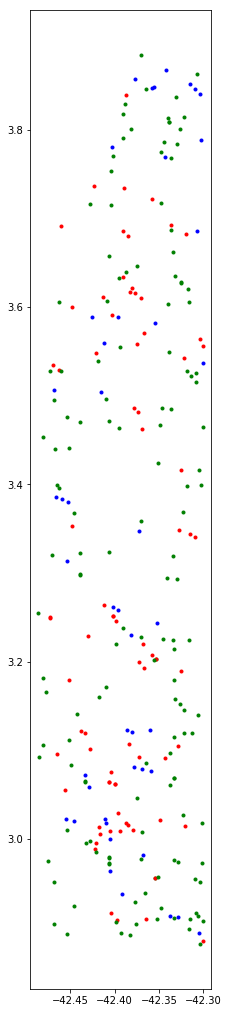

In [3]:
# plotreg.py
# 


import sys

import matplotlib.pyplot as plt
from glob import glob
#from astropy.coordinates import Angle

def sixage2deg(sxstr):
    if not (':' in sxstr):
        return float(sxstr)
    p2=0
    p1=sxstr.index(':')
    if ':' in sxstr[p1+1:]:
        p2=p1+sxstr[p1+1:].index(':')+1
    s1=sxstr[:p1]
    s2=sxstr[p1+1:p2]
    s3=sxstr[p2+1:]
    return int(s1)+int(s2)/60.+float(s3)/3600
    
fns=glob('*.reg')

fig=plt.figure(figsize=(6,18))
ax = fig.add_subplot(1,1,1)
plt.gca().set_aspect('equal', adjustable='box')
gcolor='black'
clrs=[]
fk5f=False
for fna in fns:
    reg1=open(fna) 
    lins=reg1.readlines()
    for lin in lins:
        clr=gcolor
        if (lin[:6]=='global') and ('color' in lin):
            p1=lin.index('color')
            cs=lin[p1+6:p1+6+5]
            if cs[:3]=='red': gcolor='red'
            if cs[:4]=='blue': gcolor='blue'
            if cs[:5]=='green': gcolor='green'
        elif lin[:3]=='fk5':
            fk5f=True
        elif lin[:7]=='circle(':
            p1=7
            p2=lin.index(',')
            p3=lin[p2+1:].index(',')+p2
            s1=lin[p1:p2]
            s2=lin[p2+1:p3]
            
            if ':' in s1:
                ''' comment out 4 lines
                pa=Angle(s1+' degrees')
                pb=Angle(s2+' degrees')
                x=-pa.degree*15
                y=pb.degree  
                '''
                x=-sixage2deg(s1)*15
                y=sixage2deg(s2)

            else:
                x=-float(s1) 
                y=float(s2)
            
            if 'color=' in lin:
                p4=lin.index('color=')
                cs=lin[p4+6:]
                #print cs
                if cs[:3]=='red': clr='red'
                if cs[:4]=='blue': clr='blue'
                if cs[:5]=='green': clr='green'
                if cs[:6]=='yellow': clr='yellow'
                if cs[:5]=='black': clr='black'
            ax.plot(x,y,'.',c=clr)
plt.show()


In [6]:
import astropy.io.fits
datadir=''
fns=[]
fns.append('rgb_9983_8,0_P_A0_7_diff.fits')
fns.append('rgb_9983_8,0_P_C0_7_diff.fits')
fns.append('rgb_9983_8,1_P_C0_7_diff.fits')
fns.append('rgb_9983_8,2_P_C0_7_diff.fits')
fns.append('rgb_9983_8,3_P_C0_7_diff.fits')
fns.append('rgb_9983_8,4_P_C0_7_diff.fits')
fns.append('rgb_9983_8,5_P_C0_7_diff.fits')

for fname in fns[4:5]:
    fits = astropy.io.fits.open(datadir+fname) #'rgb_9983_8,1_P_C0_7_diff.fits')
    hdu = fits[3]
    header = hdu.header
    print(header)
    #print header.get('CRVAL1'),header.get('CRVAL2')
    #print header.get('CRPIX1'),header.get('CRPIX2')


XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 4100                                                  NAXIS2  =                 4200                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               CTYPE1  = 'RA---TAN'                                                            CUNIT2  = 'deg     '                                                            CRVAL1  =     43.1404958677686                                                  CD2_2   = 4.66666666666667E-05                                                  CD1_2   =                  0.0                                                  CD1_1   = -4.6666666666666E-05          

In [7]:
naxis1=fits[1].header["NAXIS1"]
naxis2=fits[1].header["NAXIS2"]

crval1=fits[1].header["CRVAL1"]
crval2=fits[1].header["CRVAL2"]
cd1_1=fits[1].header["CD1_1"]
cd2_2=fits[1].header["CD2_2"]
crpix1=fits[1].header["CRPIX1"]
crpix2=fits[1].header["CRPIX2"]
xpts= crval1-crpix1*cd1_1,crval1-(crpix1-naxis1)*cd1_1
ypts= crval2-crpix2*cd2_2,crval2-(crpix2-naxis2)*cd2_2

dp=50
xllim,xrlim= crval1-(crpix1+dp)*cd1_1,crval1-(crpix1-naxis1-dp)*cd1_1
yllim,yulim= crval2-(crpix2+dp)*cd2_2,crval2-(crpix2-naxis2-dp)*cd2_2

print(xpts)
print(ypts)
print(xllim,xrlim)
                     


(42.49182920110194, 42.30049586776861)
(3.434341597796143, 3.6303415977961433)
42.494162534435276 42.29816253443528


/Users/myoga/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in less
/Users/myoga/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater


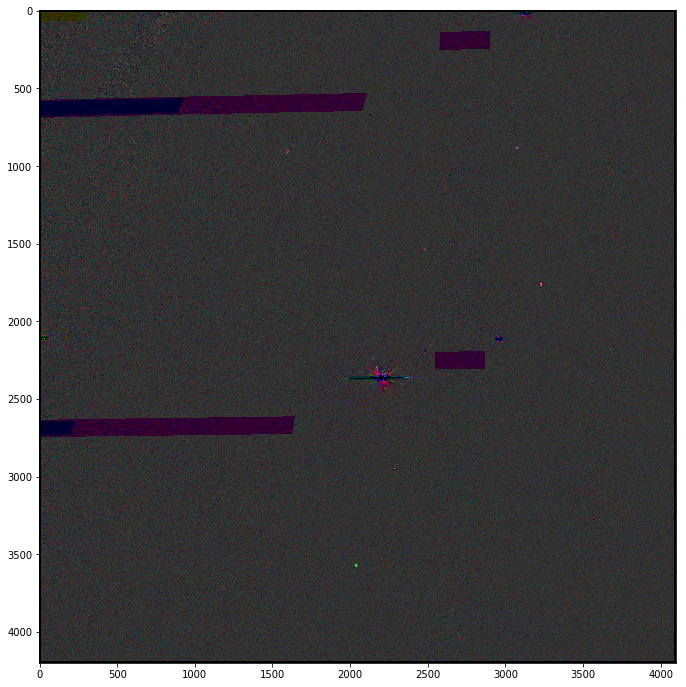

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

import astropy.io.fits
datadir='/Users/myoga/sd64/tno/rgb/'

fits = astropy.io.fits.open(datadir+'rgb_9983_8,3_P_C0_7_diff.fits')

header = hdu.header

im=np.dstack((fits[1].data,fits[2].data,fits[3].data))[::-1,:,:]

llim=-20
ulim=300
idxl=im<llim
im[idxl]=llim
idxu=im>ulim
im[idxu]=ulim

im8=np.uint8(np.arcsinh(10*(im-llim)/(ulim-llim))/3*255)

plt.figure(figsize=(12,12))
plt.imshow(im8) #[500:1500,2500:3500])
plt.show()

/Users/myoga/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to -1.211e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.392e+02 [aplpy.core]


/Users/myoga/anaconda3/envs/py36/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


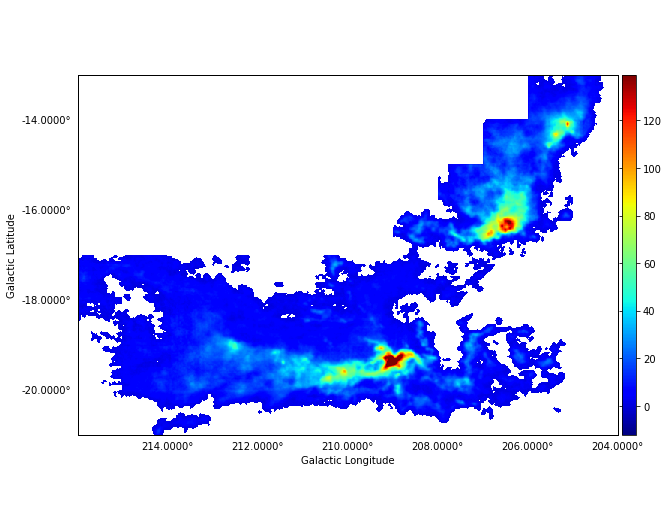

In [10]:
#https://qiita.com/nishimuraatsushi/items/f422c624027dcd34b820
import matplotlib.pyplot
import astropy.io.fits
import aplpy

# FITS ファイルを web からダウンロードする場合
fits = astropy.io.fits.open('http://www.astro.s.osakafu-u.ac.jp/~nishimura/Orion/data/Orion.CO1221.Osaka.beam204.mom0.fits.gz')
fig = aplpy.FITSFigure(fits)

# FITS ファイルが local に保存されている場合
# fig = aplpy.FITSFigure('Orion.CO1221.Osaka.beam204.mom0.fits.gz')

fig.show_colorscale()
fig.add_colorbar()
# fig.save('Orion.CO1221.Osaka.beam204.mom0.png')  # 画像を保存する場合

matplotlib.pyplot.show()